## Table of Content

#### [1.Introduction](#1)
#### [2.Variable Description](#2)
#### [3.Importing Libraries](#3)
#### [4.Understanding Our Data](#4)
#### [5.Data Preprocessing](#5)
#### [6.Exploratory Data Analysis](#6)
#### [7.Building Our Model](#7)

### Introductıon<a id=1></a>

All of our bodies are composed of cells. The human body has about 100 trillion cells within it. And usually those cells behave in a certain way. However, occasionally, one of these 100 trillion cells, behave in a different way and keeps dividing and pushes the other cells around it out of the way. That cell stops observing the rules of the tissue within which it is located and begins to move out of its normal position and starts invading into the tissues around it and sometimes entering the bloodstream and becoming is called a metastasis.

In summary, as we grow older,throughout a lifetime, we go through this kind of situation where a particular kind of gene is mutated where the protein that it makes is abnormal and drives the cell to behave in a different way that we call cancer.

This is what Dr. WIlliam H. Wolberg was observing and put together this dataset.

### Can we predict whether a cell is Malignant or Benign?

In this project. We will try to predict the cell whether is Malignant(cancer cell) or Benign(healthy). So We can ensure and take an action beforehand.

### Data Description<a id=2></a>

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

Malignant==> Cancerous

Benign==> Not Cancerous (Healthy)



### Import Librariers <a id=3></a>

In [116]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



sns.set_style("whitegrid")
%matplotlib inline

### Understanding Our Data <a id=4></a>

In [64]:
data = pd.read_csv('breastCancer.csv')

In [65]:
data.head() ## Let's discover the dataset

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [67]:
data.shape # Dataset consists of 699 observation and 11 variables.

(699, 11)

### Data Preprocessing <a id=5></a>

Text(0.5, 1.0, 'Number of Each Class')

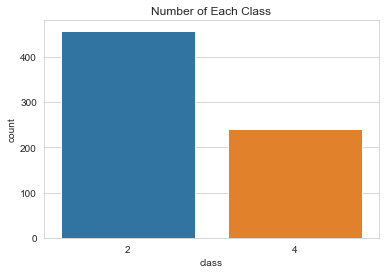

In [68]:
sns.countplot(data["class"])
plt.title("Number of Each Class")

Our data is imbalanced We might need to solve this problem. Let's move on for now.

In [69]:
for i in data.columns:
    print(data[i].value_counts())
    print("-"*100)
    

1182404    6
1276091    5
1198641    3
466906     2
1116116    2
          ..
1207986    1
1302428    1
857774     1
1181356    1
625201     1
Name: id, Length: 645, dtype: int64
----------------------------------------------------------------------------------------------------
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: clump_thickness, dtype: int64
----------------------------------------------------------------------------------------------------
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: size_uniformity, dtype: int64
----------------------------------------------------------------------------------------------------
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: shape_uniformity, dtype: int64
----------------------------------------------------------------------------------------------------
1     40

- ##### We see that data type of the bare_nucleoli is supposed to be int64 .Therefore we need to change the data type from object to integer 

In [70]:
data[data['bare_nucleoli']=='?']['bare_nucleoli'].count()

16

In [71]:
data.head()  # Let's see the first 5 rows with futures by using head method

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [72]:
data[data['bare_nucleoli']=='?'].sum()

id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

In [73]:
df = data.replace('?',np.nan)  ## We replaced the question mark with NaN which is null value

In [74]:
df = df.fillna(df.median())   ## We just replaced all the null values with their median

In [75]:
df.isnull().sum() # Cehecking missing values

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

##### Now we need to change datatype of 'bare_nucleoli' with integer

In [76]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')     ## Change the datatype 

In [77]:
df.describe() # Let's see basic statistics of our numeric features

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [78]:
## Since id feature  is not giving any info about the dataset . We can basicly drop the columns with drop method.
df.drop("id",axis=1,inplace=True)

### Exploratory Data Analysis<a id=6></a>

In [79]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


#### Bivariate Analysis

Text(0.5, 1.0, 'Number of Each Class')

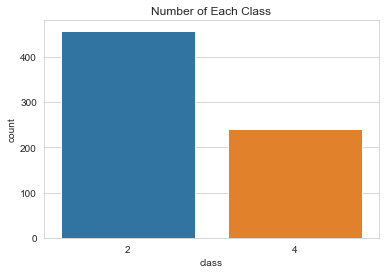

In [80]:
sns.countplot(df["class"])
plt.title("Number of Each Class")

#### Distribution of Numeric Values

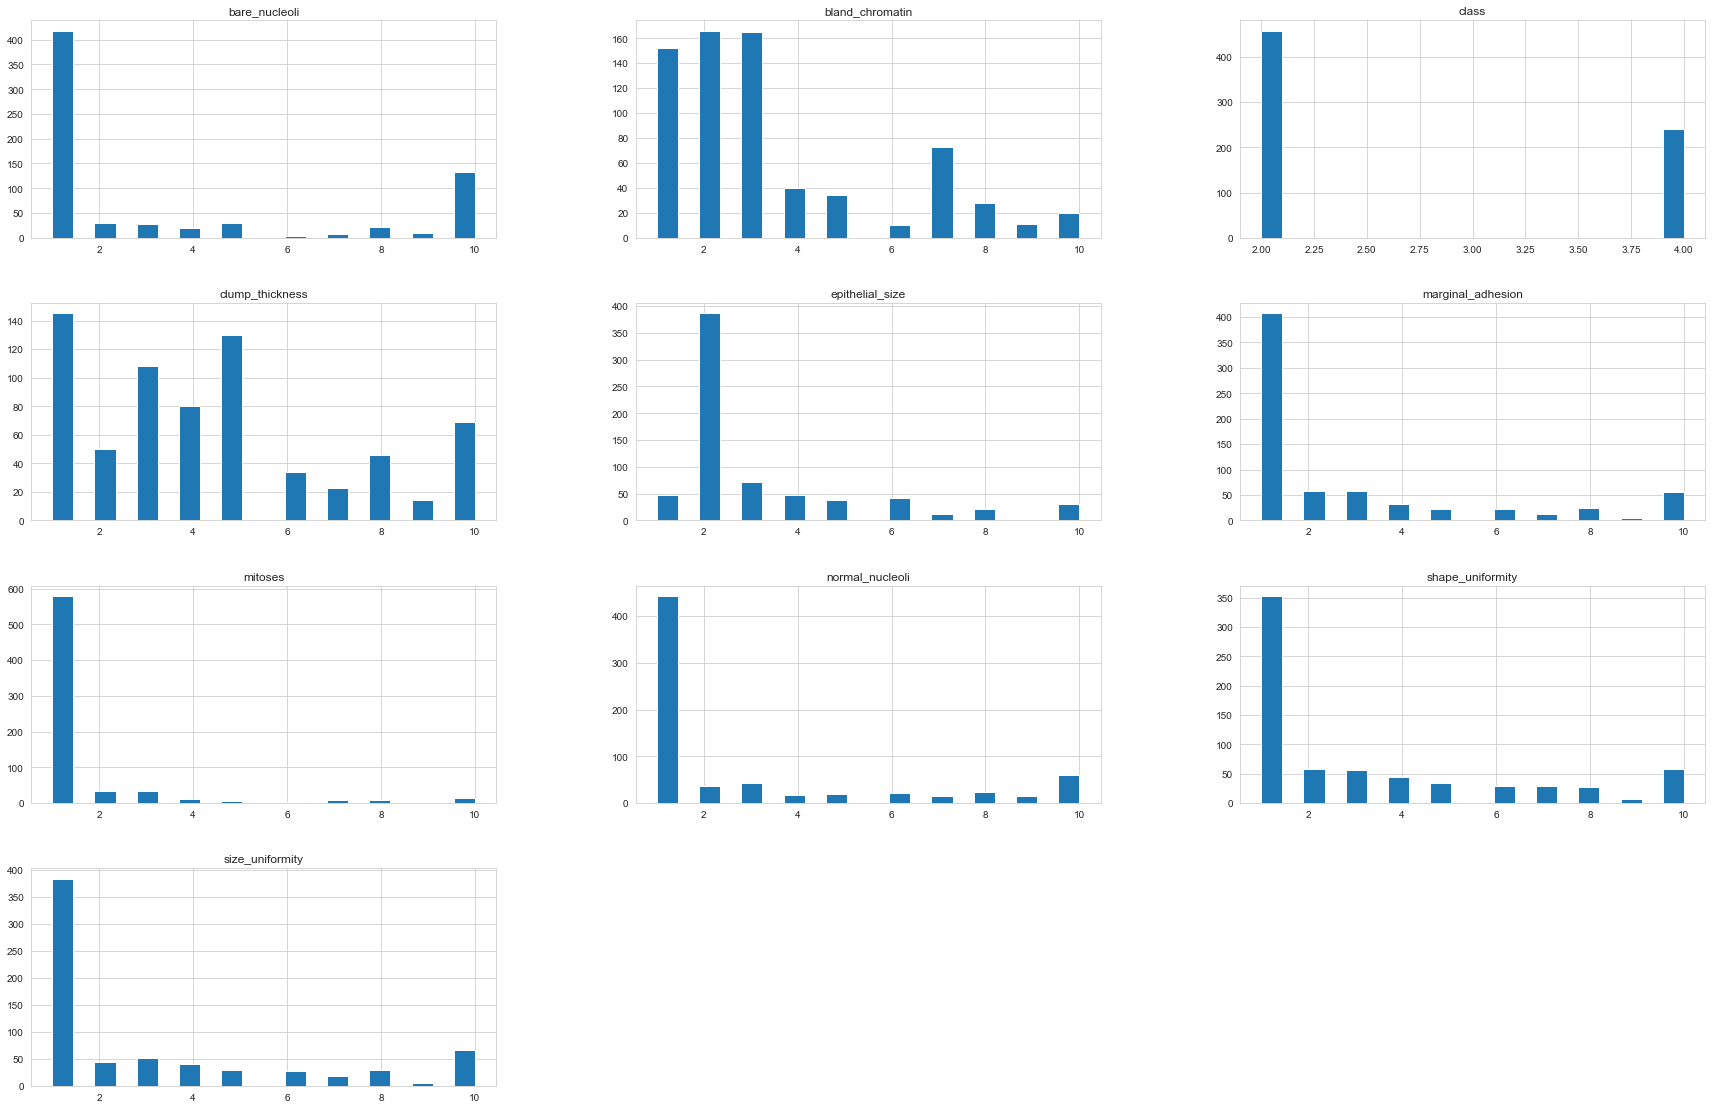

In [81]:
df.hist(bins=20,figsize=(30,30),layout=(6,3));

### Multivariate Data Analysis

In [82]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [83]:
cor = df.corr()  #We assigned a string value.

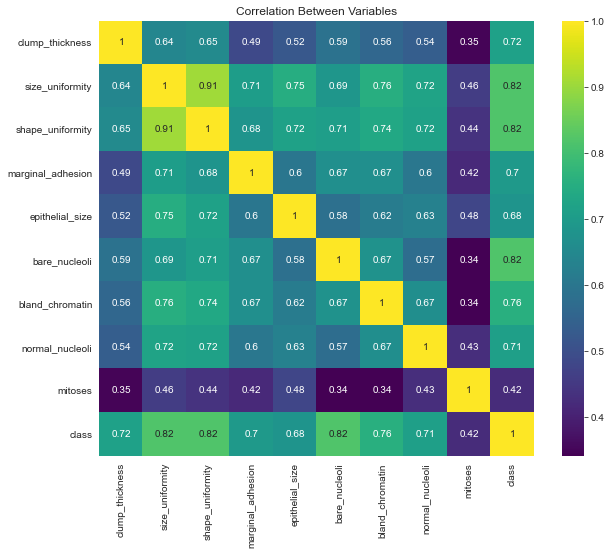

In [84]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot = True,square = True,cmap="viridis",vmax=1)
plt.title("Correlation Between Variables")
plt.show()

In [151]:
df.to_csv("preprocessed.csv")

### Building Our Model<a id=7></a>

#### We need to seperate our dataset as two parts. Train and Test 

In [150]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [86]:
X = df.drop("class",axis=1)  ## Features 
y = df["class"]              # Target

#### After We separated our feature and target columns. We need to call train_test_split function from sckit.learn

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) 
## We used train_test_split function to split our data into train and test 


### Feature Importance

In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [90]:
fs = SelectKBest(score_func=f_regression, k=5)

In [91]:
X_selected  = fs.fit_transform(X_train,y_train)

In [92]:
dfscores = pd.DataFrame(fs.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
fs.scores_


array([ 494.49024704,  985.62788529, 1012.23648456,  462.61923028,
        429.36740089,  991.42947844,  648.88929384,  499.01142904,
         99.64849568])

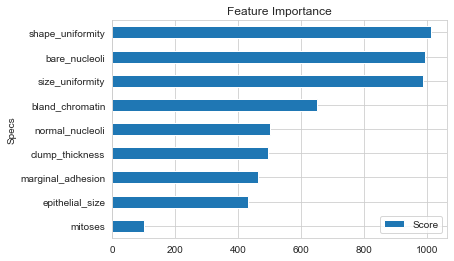

In [93]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores= featureScores.set_index("Specs").sort_values(by="Score")
featureScores.plot(kind="barh",title="Feature Importance")
plt.show()

### KNeighborsClassifier

In [117]:
from sklearn.neighbors import KNeighborsClassifier 

#### Choosing Optimal K Values

Minimum error:- 0.02857142857142857 at K = 2


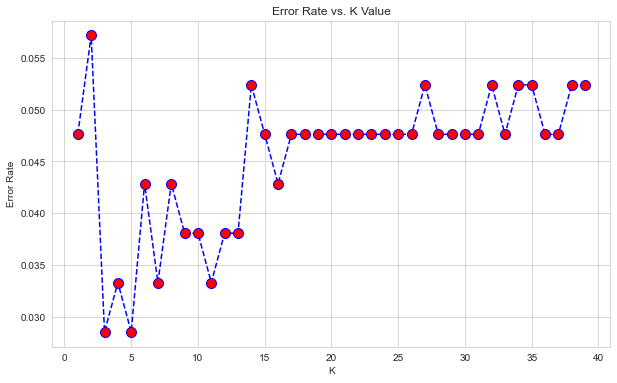

In [118]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [119]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [120]:
knn_pred = knn.predict(X_test)

In [127]:
print("Accuracy Score is :",accuracy_score(y_test,knn_pred))

Accuracy Score is : 0.9714285714285714


### Support Vector Machine

In [128]:
from sklearn.svm import SVC  # import SVC

#### Hyperparameter Tuning

In [129]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)

In [132]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [133]:
grid.fit(X_train,y_train)

In [135]:
print("Accuracy Score is :",accuracy_score(y_test,svm_pred))

Accuracy Score is : 0.9761904761904762


### Random Forest Classifier

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [137]:
rf = RandomForestClassifier()

#### HyperParameter Tuning

In [140]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [141]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [142]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [143]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [144]:
rf_pred = rf_random.predict(X_test)

In [145]:
print("Accuracy Score is :",accuracy_score(y_test,rf_pred))

Accuracy Score is : 0.9761904761904762


## Model Evaluation

In [146]:
from sklearn.metrics import classification_report,accuracy_score

In [53]:
print("KNN Classification Report")

print("..."*35)

print(classification_report(y_test,predicted_1))

KNN Classification Report
.........................................................................................................
              precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



In [47]:
print("SVC Classification Report")

print("..."*35)

print(classification_report(y_test,))

SVC Classification Report
.........................................................................................................
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



In [48]:
from sklearn.metrics import confusion_matrix

### Confusion Metrics for KNN

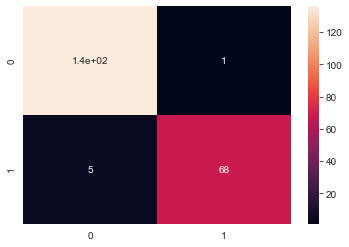

In [147]:
sns.heatmap(confusion_matrix(y_test,knn_pred),annot = True)

### Confusion Metrics for SVM

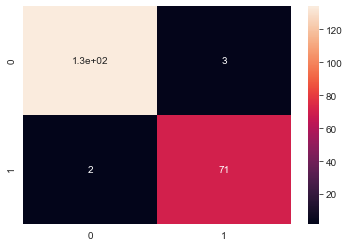

In [148]:
sns.heatmap(confusion_matrix(y_test,svm_pred),annot = True)

### Confusion Metrics for Random Forest Classifier

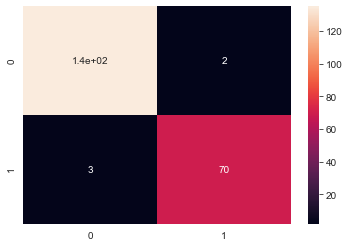

In [149]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot = True)

### Conclusion